In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv(r'D:\ML Projects\Black Friday Sales Prediction\train.csv')
test = pd.read_csv(r'D:\ML Projects\Black Friday Sales Prediction\test.csv')
(train.head())
sub1 =test['User_ID']
sub2 = test['Product_ID']

In [4]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
None
<class 'p

In [6]:
print(train.shape)
print(test.shape)

(550068, 12)
(233599, 11)


In [7]:
print(train.isnull().sum())
print(test.isnull().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64


In [8]:
print(train.describe())
print(test.describe())

            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5

In [9]:
categorical_cols = [cname for cname in train.columns if
                  train[cname].nunique()< 10 and
                  train[cname].dtypes == 'object']
categorical_cols_test = [cname for cname in test.columns if
                   test[cname].nunique()<10 and
                   test[cname].dtypes == 'object']
numerical_cols = [cname for cname in train.columns if
                train[cname].dtypes in ['int64','float64']]
numerical_cols_test = [cname for cname in test.columns if
                      test[cname].dtypes in ['int64','float64']] 

In [10]:
print(categorical_cols)
print(categorical_cols_test)
print(numerical_cols)
print(numerical_cols_test)

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']


In [11]:
my_cols = categorical_cols + numerical_cols
my_cols_test = categorical_cols_test + numerical_cols_test
test =   test[my_cols_test].copy()
train = train[my_cols].copy()
print(train.head())
print(test.head())

  Gender   Age City_Category Stay_In_Current_City_Years  User_ID  Occupation  \
0      F  0-17             A                          2  1000001          10   
1      F  0-17             A                          2  1000001          10   
2      F  0-17             A                          2  1000001          10   
3      F  0-17             A                          2  1000001          10   
4      M   55+             C                         4+  1000002          16   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 NaN                 NaN   
1               0                   1                 6.0                14.0   
2               0                  12                 NaN                 NaN   
3               0                  12                14.0                 NaN   
4               0                   8                 NaN                 NaN   

   Purchase  
0      8370  
1   

# Feature Selection

<AxesSubplot:>

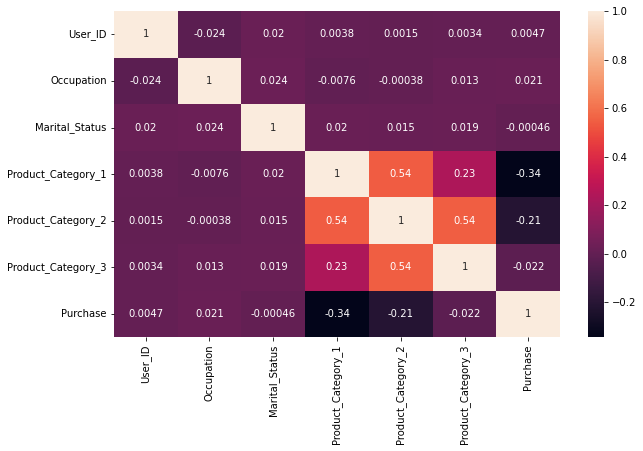

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Correlation matrix
cor = train.corr()

#Plotting Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(cor,annot = True)

In [13]:
train.drop(['Product_Category_3'],axis =1,inplace =True)
test.drop(['Product_Category_3'],axis =1,inplace =True)

In [14]:
train.isnull().sum()

Gender                             0
Age                                0
City_Category                      0
Stay_In_Current_City_Years         0
User_ID                            0
Occupation                         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Purchase                           0
dtype: int64

In [15]:
print(train.head())
print(test.head())

  Gender   Age City_Category Stay_In_Current_City_Years  User_ID  Occupation  \
0      F  0-17             A                          2  1000001          10   
1      F  0-17             A                          2  1000001          10   
2      F  0-17             A                          2  1000001          10   
3      F  0-17             A                          2  1000001          10   
4      M   55+             C                         4+  1000002          16   

   Marital_Status  Product_Category_1  Product_Category_2  Purchase  
0               0                   3                 NaN      8370  
1               0                   1                 6.0     15200  
2               0                  12                 NaN      1422  
3               0                  12                14.0      1057  
4               0                   8                 NaN      7969  
  Gender    Age City_Category Stay_In_Current_City_Years  User_ID  Occupation  \
0      M  46-50   

In [16]:
print(train.isnull().sum())
print(test.isnull().sum())

Gender                             0
Age                                0
City_Category                      0
Stay_In_Current_City_Years         0
User_ID                            0
Occupation                         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Purchase                           0
dtype: int64
Gender                            0
Age                               0
City_Category                     0
Stay_In_Current_City_Years        0
User_ID                           0
Occupation                        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            72344
dtype: int64


In [17]:
train['Product_Category_2'+'_mean_imputed_']=train['Product_Category_2'].fillna(train['Product_Category_2'].mean(),inplace =True)
test['Product_Category_2'+'_mean_imputed_']=test['Product_Category_2'].fillna(test['Product_Category_2'].mean(),inplace =True)

train.drop(['Product_Category_2_mean_imputed_'],axis=1,inplace=True)
test.drop(['Product_Category_2_mean_imputed_'],axis=1,inplace=True)


In [18]:
print(train.isnull().sum())
print(test.isnull().sum())

Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
User_ID                       0
Occupation                    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
User_ID                       0
Occupation                    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64


In [19]:
print(train.Gender.unique())
print(test.Gender.unique())

print(train.Age.unique())
print(test.Age.unique())

print(train.City_Category.unique())
print(test.City_Category.unique())

print(train.Stay_In_Current_City_Years.unique())
print(test.Stay_In_Current_City_Years.unique())

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

['F' 'M']
['M' 'F']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
['46-50' '26-35' '36-45' '18-25' '51-55' '55+' '0-17']
['A' 'C' 'B']
['B' 'C' 'A']
['2' '4+' '3' '1' '0']
['2' '0' '4+' '1' '3']


['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [20]:
test.shape

(233599, 9)

In [21]:
mapping ={
    "0":1,
    "1":2,
    "2":3,
    "3":4,
    "4+":6
}
train.loc[:,"Stay_In_Current_City_Years"]=train['Stay_In_Current_City_Years'].map(mapping)
test.loc[:,'Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].map(mapping)

In [22]:
test = test.dropna(axis=0)

In [23]:
print(test.shape)
print(train.isnull().sum())
print(test.isnull().sum())


(233599, 9)
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
User_ID                       0
Occupation                    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
User_ID                       0
Occupation                    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64


In [24]:
mapping ={
    "0-17":9,
    "55+":65,
    "26-35":30,
    "46-50":48,
    "51-55":53,
    "36-45":40,
    "18-25":23,
}
train.loc[:,"Age"]=train["Age"].map(mapping)
test.loc[:,"Age"]=test['Age'].map(mapping)

In [25]:
print(train.isnull().sum())
print(test.isnull().sum())

Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
User_ID                       0
Occupation                    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
User_ID                       0
Occupation                    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64


In [26]:
train.Age.unique()

array([ 9, 65, 30, 48, 53, 40, 23], dtype=int64)

In [27]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(['M' ,'F'])
train['Gender'] = encoder.transform(train['Gender'])



encoder.fit(['A' ,'C', 'B'])
train.City_Category = encoder.transform(train.City_Category)



In [28]:
train.drop(['User_ID'],axis=1,inplace=True)

In [29]:
train.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,9,0,3,10,0,3,9.842329,8370
1,0,9,0,3,10,0,1,6.000000,15200
2,0,9,0,3,10,0,12,9.842329,1422
3,0,9,0,3,10,0,12,14.000000,1057
4,1,65,2,6,16,0,8,9.842329,7969


<AxesSubplot:>

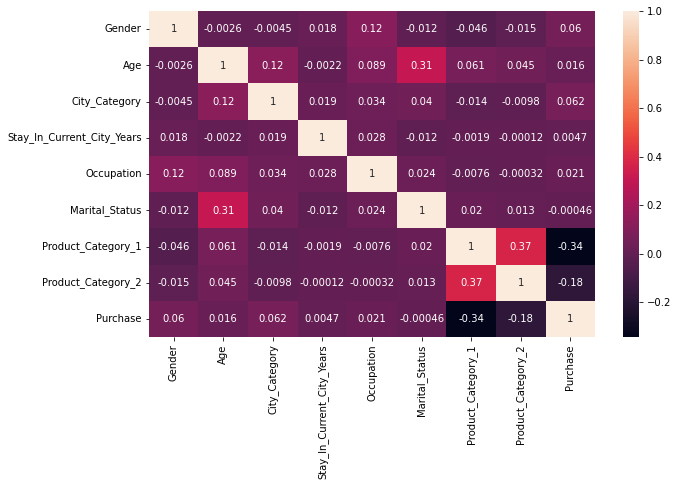

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation matrix
cor = train.corr()

#Plotting Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(cor,annot = True)

In [31]:
#sns.pairplot(train)

In [32]:
train.columns

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years',
       'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

C:\Users\Ketan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Occupation', ylabel='Density'>

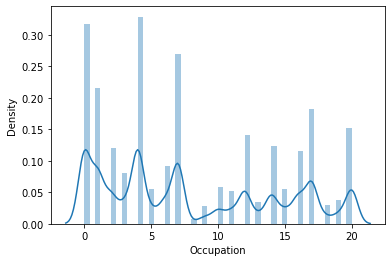

In [33]:
sns.distplot(train.Occupation)

In [34]:
#train.Occupation = np.log(train.Occupation)

In [35]:
#sns.distplot(train.Product_Category_1)

In [36]:
#train.Product_Category_1 = np.log(train.Product_Category_1)

C:\Users\Ketan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Category_1', ylabel='Density'>

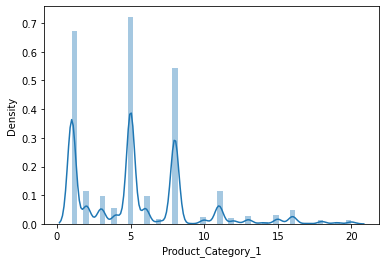

In [37]:
sns.distplot(train.Product_Category_1)

C:\Users\Ketan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Category_2', ylabel='Density'>

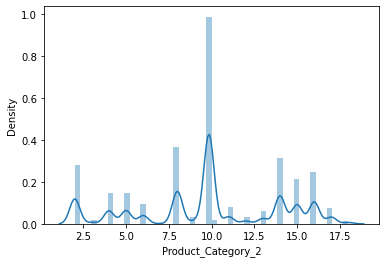

In [38]:
sns.distplot(train.Product_Category_2)

In [39]:
#train.Product_Category_2 = np.log(train.Product_Category_2)

In [40]:
#sns.distplot(train.Product_Category_2)

C:\Users\Ketan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

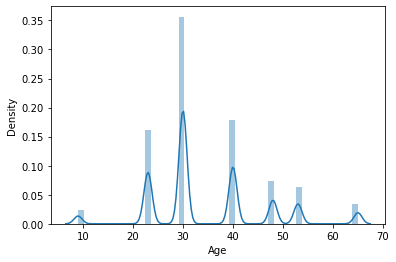

In [41]:
sns.distplot(train.Age)

In [42]:
train.Age = np.log(train.Age)

In [43]:
#sns.distplot(train.Age)

In [44]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

C:\Users\Ketan\AppData\Local\Temp/ipykernel_11676/1217278582.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [45]:
y=train['Purchase']
X=train.drop(['Purchase'],axis=1)

In [48]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [49]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=3,
    executions_per_trial=2,
    directory='project',
    project_name='Air Quality Index')

INFO:tensorflow:Reloading Oracle from existing project project\Air Quality Index\oracle.json
INFO:tensorflow:Reloading Tuner from project\Air Quality Index\tuner0.json


In [50]:
tuner.search_space_summary()

Search space summary
Default search space size: 19
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 48m 41s]
val_mean_absolute_error: 2273.9656575520835

Best val_mean_absolute_error So Far: 2227.1851399739585
Total elapsed time: 01h 55m 31s
INFO:tensorflow:Oracle triggered exit


In [41]:
tuner.results_summary()

Results summary
Results in project\Air Quality Index
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 12
units_0: 224
units_1: 192
learning_rate: 0.001
units_2: 64
units_3: 256
units_4: 256
units_5: 480
units_6: 192
units_7: 192
units_8: 32
units_9: 32
units_10: 32
units_11: 32
Score: 2227.1851399739585
Trial summary
Hyperparameters:
num_layers: 17
units_0: 448
units_1: 192
learning_rate: 0.001
units_2: 128
units_3: 416
units_4: 320
units_5: 256
units_6: 256
units_7: 480
units_8: 96
units_9: 288
units_10: 448
units_11: 224
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
Score: 2268.64208984375
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 320
learning_rate: 0.0001
units_2: 224
units_3: 96
units_4: 288
units_5: 224
units_6: 480
units_7: 256
units_8: 480
units_9: 256
units_10: 128
units_11: 96
units_12: 224
units_13: 192
units_14: 320
units_15: 64
units_16: 256
Score: 2273.96

In [46]:
X.shape

(550068, 8)

In [47]:


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


NameError: name 'X_train' is not defined

In [54]:
from tensorflow import keras
from tensorflow.keras import layers



In [55]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 224, kernel_initializer = 'he_uniform',activation='relu',input_dim = 8))

# Adding the second hidden layer
classifier.add(Dense(units = 192, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1,  activation = 'linear'))

In [56]:
opt = keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(
    optimizer=opt,
    loss='mean_absolute_error',
    metrics=['mean_absolute_error'],
)


In [57]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 13)


Epoch 1/13
29484/29484 [==============================] - 67s 2ms/step - loss: 2757.0735 - mean_absolute_error: 2757.0735 - val_loss: 2545.7720 - val_mean_absolute_error: 2545.7720
Epoch 2/13
29484/29484 [==============================] - 65s 2ms/step - loss: 2432.7393 - mean_absolute_error: 2432.7393 - val_loss: 2346.0708 - val_mean_absolute_error: 2346.0708
Epoch 3/13
29484/29484 [==============================] - 66s 2ms/step - loss: 2359.7000 - mean_absolute_error: 2359.7000 - val_loss: 2323.9729 - val_mean_absolute_error: 2323.9729
Epoch 4/13
29484/29484 [==============================] - 66s 2ms/step - loss: 2418.2517 - mean_absolute_error: 2418.2517 - val_loss: 2322.2102 - val_mean_absolute_error: 2322.2102
Epoch 5/13
29484/29484 [==============================] - 66s 2ms/step - loss: 2333.8352 - mean_absolute_error: 2333.8352 - val_loss: 2280.2314 - val_mean_absolute_error: 2280.2314
Epoch 6/13
29484/29484 [==============================] - 65s 2ms/step - loss: 2322.5864 - mean

In [59]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)



In [60]:
y_pred


array([[13499.473 ],
       [ 3403.9448],
       [14745.623 ],
       ...,
       [12441.737 ],
       [12643.946 ],
       [14792.78  ]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [269]:
test.Gender.unique()

array(['M', 'F'], dtype=object)

In [61]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(['M' ,'F'])
test['Gender'] = encoder.transform(test['Gender'])

encoder.fit(['A' ,'C', 'B'])
test.City_Category = encoder.transform(test.City_Category)

In [62]:
test.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2
0,1,48,1,3,1000004,7,1,1,11.0
1,1,30,2,1,1000009,17,0,3,5.0
2,0,40,1,6,1000010,1,1,5,14.0
3,0,40,1,6,1000010,1,1,4,9.0
4,0,30,2,2,1000011,1,0,4,5.0


In [63]:
test.drop(['User_ID'],axis=1,inplace=True)

In [64]:
train.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,2.197225,0,3,10,0,3,9.842329,8370
1,0,2.197225,0,3,10,0,1,6.000000,15200
2,0,2.197225,0,3,10,0,12,9.842329,1422
3,0,2.197225,0,3,10,0,12,14.000000,1057
4,1,4.174387,2,6,16,0,8,9.842329,7969


In [65]:
test.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Occupation,Marital_Status,Product_Category_1,Product_Category_2
0,1,48,1,3,7,1,1,11.0
1,1,30,2,1,17,0,3,5.0
2,0,40,1,6,1,1,5,14.0
3,0,40,1,6,1,1,4,9.0
4,0,30,2,2,1,0,4,5.0


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
def classify(model,X,y):
    X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    print("Accuracy is",model.score(X_test,y_test)*100)
    score = cross_val_score(model,X,y,cv=5)
    print("Cross Validation is",np.mean(score)*100)

In [49]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
classify(model,X,y)

Accuracy is 63.50587717189067
Cross Validation is 63.83701101506883


In [232]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, max_depth=6, eta=0.1, subsample=0.7, colsample_bytree=0.8)
classify(model,X,y)

Accuracy is 66.121087196561
Cross Validation is 66.39821115273219


In [1]:
pip install catboost

In [50]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
classify(model,X,y)

Learning rate set to 0.107116
0:	learn: 4755.7016466	total: 231ms	remaining: 3m 50s
1:	learn: 4527.4921458	total: 300ms	remaining: 2m 29s
2:	learn: 4323.4953321	total: 369ms	remaining: 2m 2s
3:	learn: 4159.0509508	total: 436ms	remaining: 1m 48s
4:	learn: 4020.9041084	total: 508ms	remaining: 1m 41s
5:	learn: 3913.3367113	total: 576ms	remaining: 1m 35s
6:	learn: 3826.1998629	total: 649ms	remaining: 1m 32s
7:	learn: 3712.4971883	total: 709ms	remaining: 1m 27s
8:	learn: 3641.0529036	total: 775ms	remaining: 1m 25s
9:	learn: 3570.5157991	total: 843ms	remaining: 1m 23s
10:	learn: 3491.1777683	total: 945ms	remaining: 1m 24s
11:	learn: 3423.6582675	total: 1.03s	remaining: 1m 25s
12:	learn: 3382.8507085	total: 1.13s	remaining: 1m 25s
13:	learn: 3347.1002960	total: 1.22s	remaining: 1m 25s
14:	learn: 3301.2577166	total: 1.31s	remaining: 1m 26s
15:	learn: 3271.8434366	total: 1.4s	remaining: 1m 26s
16:	learn: 3234.1206243	total: 1.47s	remaining: 1m 24s
17:	learn: 3214.9022518	total: 1.54s	remaining:

In [ ]:
model = cb.CatBoostRegressor(loss_function=’RMSE’)

In [416]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [638]:
test.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Occupation,Marital_Status,Product_Category_1,Product_Category_2
0,1,48,1,3,7,1,1,11.0
1,1,30,2,1,17,0,3,5.0
2,0,40,1,6,1,1,5,14.0
3,0,40,1,6,1,1,4,9.0
4,0,30,2,2,1,0,4,5.0


In [66]:
test = test.dropna(axis=0)
test.Stay_In_Current_City_Years.unique()

array([3, 1, 6, 2, 4], dtype=int64)

In [276]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test)
test = scaler.transform(test)

In [ ]:
y_pred = classifier.predict(X_test)

In [67]:
y_pred = classifier.predict(test)

In [68]:
y_pred

array([[6456.7305],
       [5867.6064],
       [2180.105 ],
       ...,
       [7548.698 ],
       [2180.105 ],
       [2180.105 ]], dtype=float32)

In [69]:
df = pd. DataFrame(y_pred, columns=['Purchase']) 

In [70]:
df

,Purchase
0,6456.730469
1,5867.606445
2,2180.104980
3,2180.104980
4,2180.104980
...,...
233594,2180.104980
233595,2180.104980
233596,7548.698242
233597,2180.104980


In [71]:
 df['User_ID']=sub1

In [72]:
df


,Purchase,User_ID
0,6456.730469,1000004
1,5867.606445,1000009
2,2180.104980,1000010
3,2180.104980,1000010
4,2180.104980,1000011
...,...,...
233594,2180.104980,1006036
233595,2180.104980,1006036
233596,7548.698242,1006036
233597,2180.104980,1006037


In [73]:
df['Product_ID'] = sub2

In [74]:
df = df[['User_ID', 'Product_ID','Purchase']]

In [75]:
import csv
df.to_csv("D:\ML Projects\Black Friday Sales Prediction\suntv.csv")

In [76]:
df.shape

(233599, 3)

In [77]:
ss = pd.read_csv(r'D:\ML Projects\Black Friday Sales Prediction\sun.csv')

In [78]:
ss.shape

(233599, 4)